Here, we are simply going to visualise the wavefunctions produced in the C++ code for the 1-Dimensional particle in a Box. I'm using Python rather than C++, as Python has much more graphical functionality, and considering C++ has done most of the heavy lifting, we may aswell use Python from here on out. 

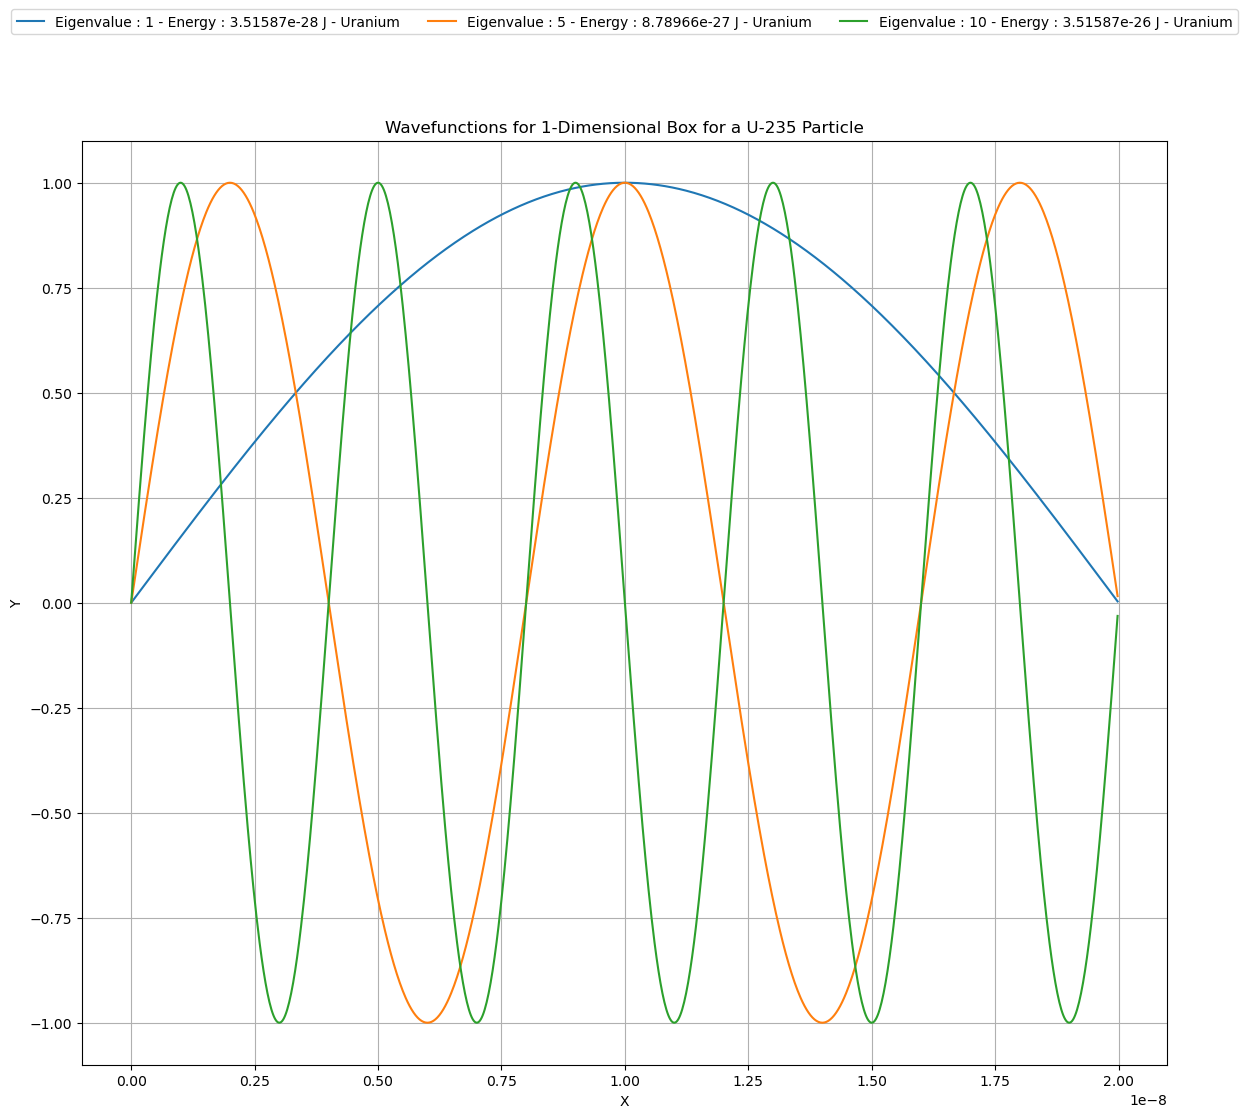

In [1]:
import matplotlib.pyplot as plt

# List of file names
file_names = ["Eigenvalue_1_Particle_Uranium.txt", "Eigenvalue_5_Particle_Uranium.txt", "Eigenvalue_10_Particle_Uranium.txt"]

# Create a bigger plot
plt.figure(figsize=(14, 12))

# Loop through each file
for file_name in file_names:
    with open(file_name, 'r') as file:
        # Read data from the file
        data = file.readlines()

        # Extract legend from the first line
        legend = data[0].strip()

        # Extract x and y values from the data
        x = []
        y = []
        for line in data[1:]:  # Skip the header row
            values = line.split()  # Assuming values are separated by whitespace
            x.append(float(values[0]))
            y.append(float(values[1]))

        # Plot the data with the legend
        plt.plot(x, y, label=legend)

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Wavefunctions for 1-Dimensional Box for a U-235 Particle')
plt.grid()

# Add legend at the top
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=len(file_names))

# Show the plot
plt.savefig("Wavefunctions_U235_N_1_5_10.png")
plt.show()


Above we can see the solution $\Psi(x) = \sqrt{\frac{2}{L}}sin(\frac{n\pi x}{L})$. Here we have it plotted for Eigenvalues of 1, 5 and 10. Visually one can see the cycles of the Sin function, with $\pi$, 5$\pi$ and 10$\pi$ radians of the Sin wave within the box in each solution. We can also see that the solution obeys the boundary conditions at the box walls also, with $\Psi$ = 0 at bot x = 0 & x = 200 Angstroms.

#### Energy values for different Particles at different Eigenvalues

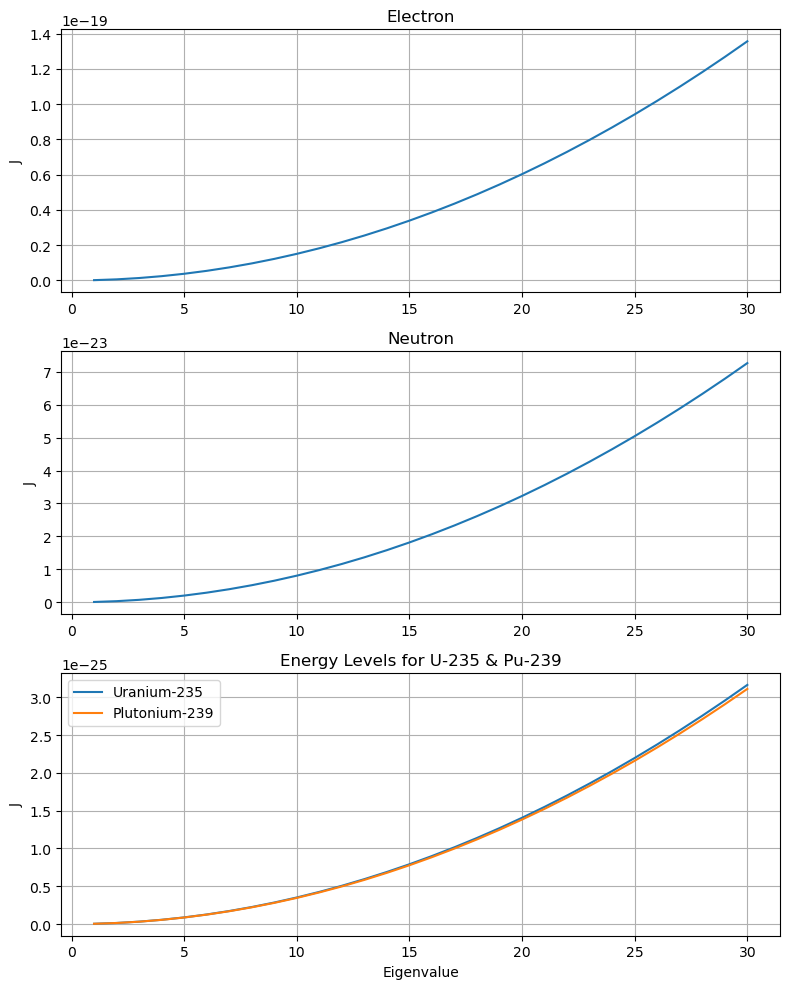

In [2]:
import numpy as np

# Load data from the text file, skipping the first row
data = np.loadtxt('Eigenenergies_from_1_to_30.txt', skiprows=1)

# Extract the first 4 columns
x = [i for i in range(1,31)]
y1 = data[:, 0]
y2 = data[:, 1]
y3 = data[:, 2]
y4 = data[:, 3]

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(8, 10))

# Plot column 1
axs[0].plot(x, y1, label='Electron')
axs[0].set_ylabel('J')
axs[0].set_title('Electron')
axs[0].grid()

# Plot column 2
axs[1].plot(x, y2, label='Neutron')
axs[1].set_ylabel('J')
axs[1].set_title('Neutron')
axs[1].grid()

# Plot columns 3 and 4
axs[2].plot(x, y3, label='Uranium-235')
axs[2].plot(x, y4, label='Plutonium-239')
axs[2].set_xlabel('Eigenvalue')
axs[2].set_ylabel('J')
axs[2].set_title('Energy Levels for U-235 & Pu-239')
axs[2].grid()

# Add legend to the last subplot
axs[2].legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.savefig("Energy_Values.png")
plt.show()


I had initially combined all 4 plots here, but note the Y-Axis for each. The energy of an Electron >> Neutron >> U & Pu. 

All 4 particles can be seen to follow the quadratic relationship between E and n. Remember the energies were given by:
\begin {equation}
E_{n} = \frac{h^{2}n^{2}}{8mL^{2}}
\end{equation}
The inverse relationship between mass and Energy can also be seen here. Given that Plutonium-239 has a larger Atomic Number than Uranium, it makes sense that Pu has a slightly tapered graph at higher energy levels as can be seen below. 

## Monte Carlo Methods

This section graphs both the Monte Carlo Estimation of the Eigenenergies from 1 to 10, as well as the known Analytical Energies. 

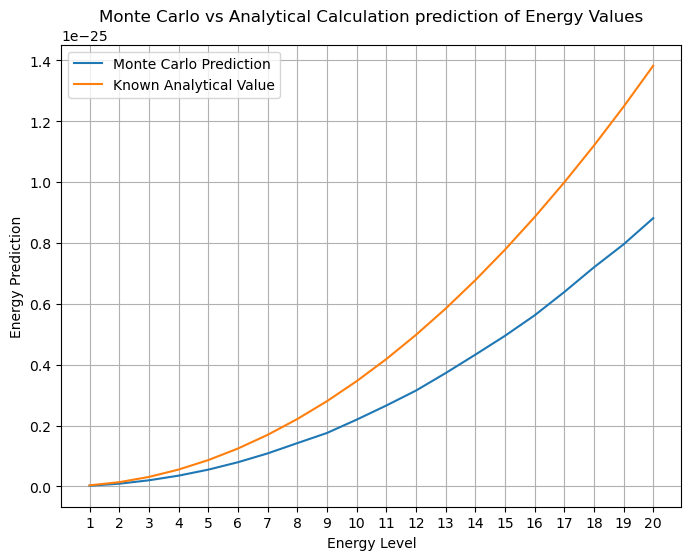

In [24]:
# Load data from the text file, skipping the first row
data = np.loadtxt('Monte_Carlo_Energy.txt', skiprows=1)

x = [i for i in range(1,21)]
y1 = data[:,0]
y2 = data[:,1]

plt.figure(figsize=(8, 6))
plt.plot(x, y1, label=legend)
plt.plot(x, y2, label=legend)

plt.xlabel('Energy Level')
plt.ylabel('Energy Prediction')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.title('Monte Carlo vs Analytical Calculation prediction of Energy Values')
plt.grid()

# Add legend at the top
plt.legend(['Monte Carlo Prediction','Known Analytical Value'])
plt.savefig("MonteCarloEnergy.png")

Here we see that the Monte Carlo estimation is quite accurate, of the correct order of magnitude at least! However, we can see that as we extend into higher energy levels this approximation method becomes more innacurate. Not massively, but when we're dealing with energies as small as we have here, these errors matter. 

The main reason for this I feel, stems from the wavefunction. In this case, it is a Sine wave. As we increase $n$ above, we add 1 $\pi$ radian to the sine argument, meaning an extra half cycle in the region 0 to L. As we proceed, $\Psi(x)$ begins to rapidly oscillate. This will affect the sampling of the wavefunction that is critical to the Monte Carlo method. 

As the graph changes rapidly, the finite number of samples we have, we'll get a less accurate representation of $\Psi$ with our samples. This therefore affects the final averaged energy per eigenvalue. 